In [69]:
import os
import re
import tqdm
import string
import pandas as pd
import numpy as np
import util
from sklearn.decomposition import TruncatedSVD
#from data_preprocessing import *
import word_embedding_load as wel
import baseline_classification as bc
import matplotlib.pyplot as plt
import feature_selection_evaluation as fse
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import nltk

In [70]:
[all_data, train_size, test_size, train_x, train_y, test_x] = util.loadData()

In [71]:
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

In [72]:
bag_of_words = count_vectorizer.fit_transform(all_data['Text'])

In [73]:
X_bow_train = bag_of_words[:train_size]
X_bow_test = bag_of_words[train_size:]

print(X_bow_train.shape)
print(X_bow_test.shape)

(3689, 310723)
(986, 310723)


In [74]:
svd = TruncatedSVD(n_components=200, n_iter=25, random_state=12)
X_bow_train_k = svd.fit_transform(X_bow_train)
svd = TruncatedSVD(n_components=200, n_iter=25, random_state=25)
X_bow_test_k = svd.fit_transform(X_bow_test)

In [75]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_one_hot_gene = wel.getGeneVec(all_data, svd)
truncated_one_hot_variation = wel.getVariationVec(all_data, svd)

In [76]:
train_set = np.hstack((truncated_one_hot_gene[:train_size], truncated_one_hot_variation[:train_size], X_bow_train_k))
test_set = np.hstack((truncated_one_hot_gene[train_size:], truncated_one_hot_variation[train_size:], X_bow_test_k))

encoded_y = pd.get_dummies(train_y)
encoded_y = np.array(encoded_y)
y = np.array(bc.getLabels(encoded_y))
X_bow = np.array(train_set)

In [77]:
print(X_bow.shape)
print(y.shape)

(3689, 250)
(3689,)


Accuracy: 0.5687 ± 0.0204
NMI: 0.3146 ± 0.0215
Log_loss: 7.5583 ± 0.4221
Normalized confusion matrix
[[ 0.58761329  0.04833837  0.01359517  0.14954683  0.0755287   0.03323263
   0.09063444  0.00151057  0.        ]
 [ 0.11445783  0.46586345  0.00200803  0.04618474  0.01606426  0.02811245
   0.32730924  0.          0.        ]
 [ 0.13541667  0.02083333  0.33333333  0.19791667  0.04166667  0.
   0.27083333  0.          0.        ]
 [ 0.23035952  0.03728362  0.01731025  0.64713715  0.01198402  0.00798935
   0.04793609  0.          0.        ]
 [ 0.26966292  0.07490637  0.02996255  0.11235955  0.39700375  0.01498127
   0.1011236   0.          0.        ]
 [ 0.15824916  0.06397306  0.01683502  0.05050505  0.03703704  0.5993266
   0.07407407  0.          0.        ]
 [ 0.09392789  0.17172676  0.0256167   0.05882353  0.0170778   0.00379507
   0.62523719  0.00094877  0.0028463 ]
 [ 0.23809524  0.38095238  0.          0.          0.          0.
   0.33333333  0.          0.04761905]
 [ 0.1627907

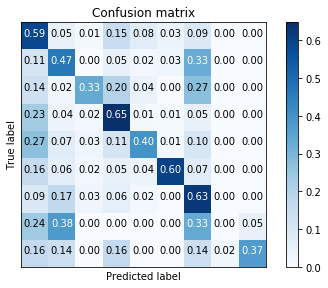

array([[ 0.58761329,  0.04833837,  0.01359517,  0.14954683,  0.0755287 ,
         0.03323263,  0.09063444,  0.00151057,  0.        ],
       [ 0.11445783,  0.46586345,  0.00200803,  0.04618474,  0.01606426,
         0.02811245,  0.32730924,  0.        ,  0.        ],
       [ 0.13541667,  0.02083333,  0.33333333,  0.19791667,  0.04166667,
         0.        ,  0.27083333,  0.        ,  0.        ],
       [ 0.23035952,  0.03728362,  0.01731025,  0.64713715,  0.01198402,
         0.00798935,  0.04793609,  0.        ,  0.        ],
       [ 0.26966292,  0.07490637,  0.02996255,  0.11235955,  0.39700375,
         0.01498127,  0.1011236 ,  0.        ,  0.        ],
       [ 0.15824916,  0.06397306,  0.01683502,  0.05050505,  0.03703704,
         0.5993266 ,  0.07407407,  0.        ,  0.        ],
       [ 0.09392789,  0.17172676,  0.0256167 ,  0.05882353,  0.0170778 ,
         0.00379507,  0.62523719,  0.00094877,  0.0028463 ],
       [ 0.23809524,  0.38095238,  0.        ,  0.        ,  0

In [78]:
bc.baseline(X_bow, y)

In [79]:
import pickle
# save
with open('../data/feature/X_bow_test.pkl', 'wb') as f:
    pickle.dump(X_bow_test, f)
    f.close()
with open('../data/feature/X_bow_train.pkl', 'wb') as f:
    pickle.dump(X_bow, f)
    f.close()
with open('../data/feature/label_bow.pkl', 'wb') as f:
    pickle.dump(y, f)
    f.close()

In [80]:
#load
with open('../data/feature/X_bow_test.pkl', 'rb') as f:
    X_bow_test = pickle.load(f)
    f.close()
with open('../data/feature/X_bow_train.pkl', 'rb') as f:
    X_bow = pickle.load(f)
    f.close()
with open('../data/feature/label_bow.pkl', 'rb') as f:
    y = pickle.load(f)
    f.close()
